## Clustering: DBSCAN

En esta actividad vamos a realizar un modelo de Clustering con el algoritmo visto en los apuntes conocido como DBSCAN.

Para ello, vamos a utilizar un dataset provisto por la librería Scikit-Learn a traves de la función *make_moons()*. Este dataset se utiliza para realizar clasificación binaria y genera un dataset cuya dispersión presenta un patrón de remolino que parecen dos medias lunas. El factor de ruido para generar la forma de la luna y el número de muestras se pueden controlar con la ayuda de los parámetros provistos por el método.

En primer lugar, vamos a importar todas las librerías que necesitaremos para realizar este ejercicio.

In [1]:
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

**Ejercicio 1:**
Utilizando el método [make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) crear un dataset de *500 ejemplos* con un ruido equivalente a una desviación estandar de *0.1*. En este caso, el método make_moons() devuelve por defecto dos variables, los features, que almacenaremos en la variable **X** y los labels que almacenaremos en la variable **y**.

Los labels en este caso son simplemente para visualizar los clusters que idealmente deberiamos encontrar, pero no los vamos a uilizar en nuestro entrenamiento. 

Recordemos que Clustering es una tecnica de aprendizaje no supervisado, por lo cual, no se entrena con datasets que contengan labels establecidos de antemano.

In [2]:
X, y = make_moons(n_samples=500, noise=0.1)

Ahora que tenemos las variables **X** e **y** creadas, vamos a visualizar los primeros datos creando un DataFrame de pandas.

In [3]:
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
1,1.564763,-0.275380
1,2.019043,0.154933
0,0.337085,1.049284
0,0.909462,0.169048
0,0.016206,0.936081


Veamos como quedaría el grafico de dispersión de los datos creados, con los labels provistos.

Text(0, 0.5, '$x_2$')

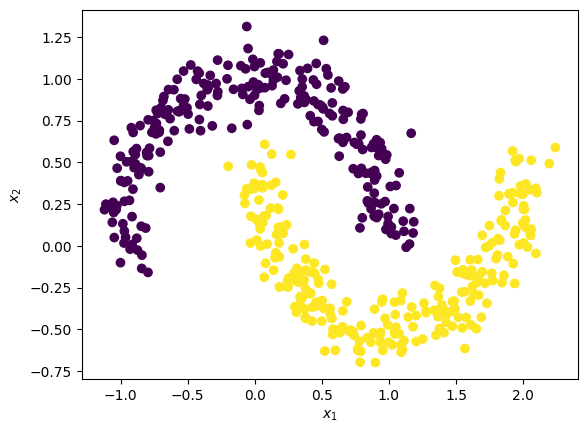

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

**Ejercicio 2:**
Con el dataset creado, solo los features (**X**), vamos a crear un modelo de Clustering usando el algoritmo DBSCAN y vamos a ajustar el modelo a los datos. En este caso, vamos a utilizar los valores por defecto de *eps* y *min_samples*. Al nuevo modelo creado vamos almacenarlo en una variable llamada **dbscan_cluster1**.

In [5]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

DBSCAN()

Con el modelo creado, visualicemos en el grafico de dispersión los clusters encontrados

Text(0, 0.5, '$x_2$')

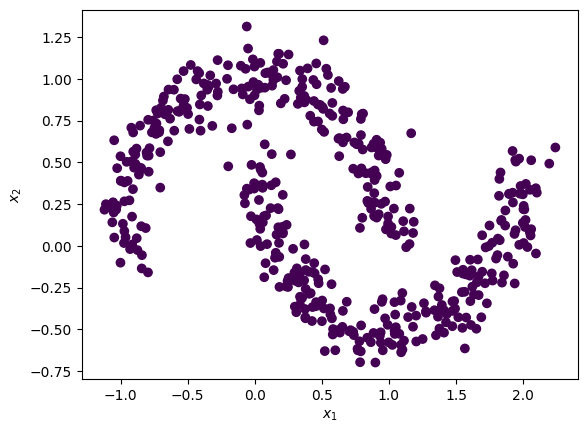

In [6]:
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Veamos ahora la cantidad de clusters y de puntos de ruido encontrados con los valores de *eps* y *min_samples* por defecto.

In [7]:
labels=dbscan_cluster1.labels_
N_clusters=len(set(labels))-(1 if -1 in labels else 0)
print('Cantidad de clusters estimados: %d' % N_clusters)

Cantidad de clusters estimados: 1


In [8]:
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Cantidad de puntos de ruido: %d' % n_noise)

Cantidad de puntos de ruido: 0


Como podemos observar el modelo creado encontró un unico cluster y ningun punto de ruido.

Veamos que sucede si creamos un modelo con otros valores de *eps* y *min_samples*. El objetivo es que el modelo sea capaz de detectar 2 clusters.

**Ejercicio 3:** Creamos un modelo de DBSCAN con un valor de *eps* de 0.1 y un valor de *min_samples* de 8. El modelo creado lo almacenamos en una variable llamada **dbscan_cluster2**

In [9]:
dbscan_cluster2 = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster2.fit(X)

DBSCAN(eps=0.1, min_samples=8)

Con el modelo creado, visualizamos el grafico de dispersión

Text(0, 0.5, '$x_2$')

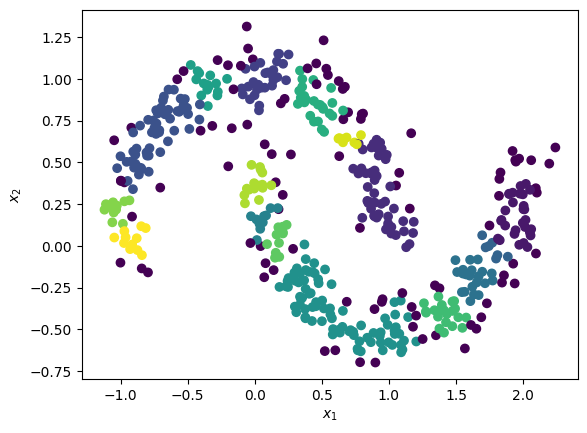

In [10]:
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster2.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

**Ejercicio 4:** 

**a)** Obtener la cantidad de clusters encontrados por el modelo

In [11]:
labels=dbscan_cluster2.labels_
N_clusters=len(set(labels))-(1 if -1 in labels else 0)
print('Cantidad de clusters estimados: %d' % N_clusters)

Cantidad de clusters estimados: 16


**b)** Obtener la cantidad de puntos de ruido

In [12]:
n_noise = list(dbscan_cluster2.labels_).count(-1)
print('Cantidad de puntos de ruido: %d' % n_noise)

Cantidad de puntos de ruido: 97


**Ejercicio 5:** ¿Qué diferencia observas entre los resultados de los dos modelos? ¿Podríamos hacerlo mejor? ¿Cómo?

# El modelo con los valores de eps y min_samples por defecto no fue capaz de encontrar los dos clusters.
# En cambio, el modelo con los valores de eps=0.1 y min_samples=8 fue capaz de encontrar los dos clusters.
# Podríamos hacerlo mejor si probamos con diferentes valores de eps y min_samples para encontrar los dos clusters. 

**Ejercicio 6:** Probar con diferentes valores de *eps* (dejando *min_samples=8*) de manera que el modelo ajustado a los datos encuentre unicamente 2 clusters. El nuevo modelo lo almacenaremos en una variable llamada **dbscan_cluster3**

In [13]:
# Probamos con eps=0.2
dbscan_cluster3 = DBSCAN(eps=0.2, min_samples=8)
dbscan_cluster3.fit(X)

DBSCAN(eps=0.2, min_samples=8)

Visualizamos el modelo creado en un grafico de dispersión

Text(0, 0.5, '$x_2$')

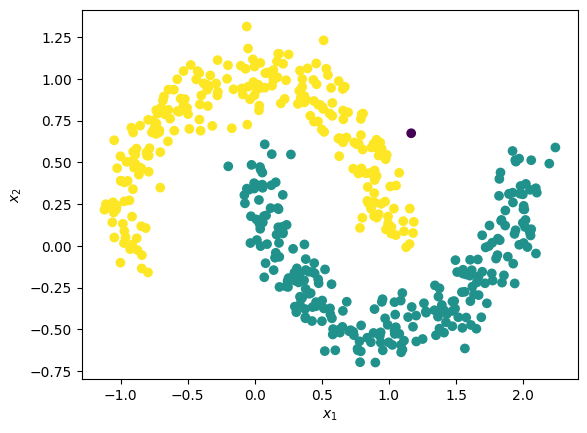

In [14]:
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster3.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Obtenemos la cantidad de clusters y de puntos de ruido

In [15]:
labels=dbscan_cluster3.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Cantidad de clusters: %d' % N_clus)

Cantidad de clusters: 2


In [16]:
n_noise = list(dbscan_cluster3.labels_).count(-1)
print('Cantidad de puntos de ruido: %d' % n_noise)

Cantidad de puntos de ruido: 1
